
Evaluation will consist of building a classifier on some dataset:

1) Explaining the dataset and problem statement, Why Is it a ML problem statement?

2) EDA

3) Data Preprocessing/Feature Engg

4) Choice of algorithm, why?

5) Training and Testing

6) Evaluation Metrics-ROC curve

7) Is there Overfitting? Why? How to reduce it?


**1)** The given dataset is a Machine learning problem because from this dataset we can predict whether the passenger is going to be survived or not based on the previously trained examples rather than memorizing

 **2) EDA & 3) Data Preprocessing** 

In [120]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [121]:
df=pd.read_csv('train.csv')

In [122]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [123]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [125]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [126]:
#Add columns which are only required
df1=df[['Survived','Pclass','Age','Sex','Embarked','SibSp','Parch']]

In [127]:
df1.head()

,Survived,Pclass,Age,Sex,Embarked,SibSp,Parch
0,0,3,22.0,male,S,1,0
1,1,1,38.0,female,C,1,0
2,1,3,26.0,female,S,0,0
3,1,1,35.0,female,S,1,0
4,0,3,35.0,male,S,0,0


In [128]:
df1.isnull().sum()

Survived      0
Pclass        0
Age         177
Sex           0
Embarked      2
SibSp         0
Parch         0
dtype: int64

In [129]:
df1['Age'].fillna(df1.Age.mean(),inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [130]:
df1['Sex'] = df1['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [131]:
df1['Embarked'].fillna(df1.Embarked.mode()[0],inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [132]:
df1['Embarked'] = df1['Embarked'].map( {'S': 0, 'C': 1, 'Q':2} ).astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [133]:
df1['family'] = df1['SibSp'] + df1['Parch']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [134]:
df1.drop(['SibSp','Parch'],axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [135]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Age       891 non-null    float64
 3   Sex       891 non-null    int64  
 4   Embarked  891 non-null    int64  
 5   family    891 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 41.9 KB


In [136]:
df1.groupby("Survived")['Survived'].count()

Survived
0    549
1    342
Name: Survived, dtype: int64

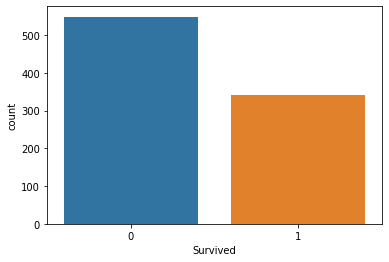

In [137]:
sns.countplot(data=df1,x='Survived')

In [138]:
df1.groupby("Sex")['Sex'].count()

Sex
0    577
1    314
Name: Sex, dtype: int64

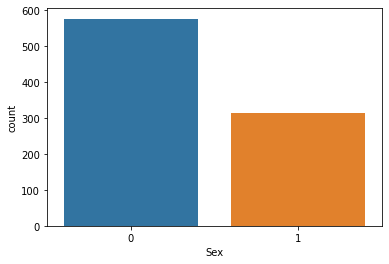

In [139]:
sns.countplot(data=df1,x='Sex')

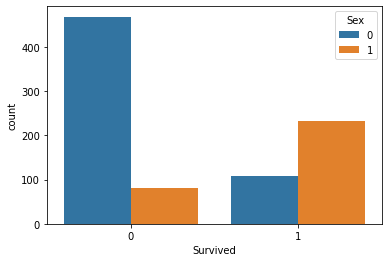

In [140]:
sns.countplot(data=df1,x='Survived',hue='Sex')

In [141]:
df1.groupby("Pclass")['Pclass'].count()

Pclass
1    216
2    184
3    491
Name: Pclass, dtype: int64

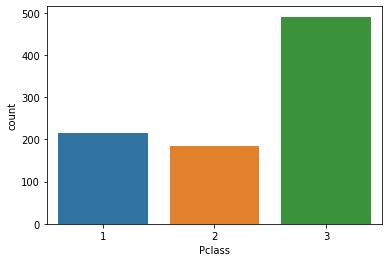

In [142]:
sns.countplot(data=df1,x='Pclass')

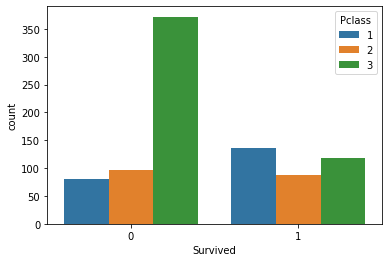

In [143]:
sns.countplot(data=df1,x='Survived',hue='Pclass')

In [144]:
df1.groupby("Embarked")['Embarked'].count()

Embarked
0    646
1    168
2     77
Name: Embarked, dtype: int64

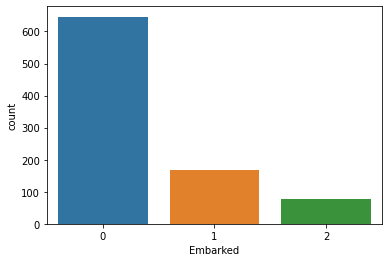

In [145]:
sns.countplot(data=df1,x='Embarked')

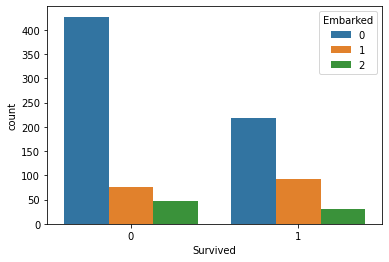

In [146]:
sns.countplot(data=df1,x='Survived',hue='Embarked')

In [147]:
df1.corr()

,Survived,Pclass,Age,Sex,Embarked,family
Survived,1.000000,-0.338481,-0.069809,0.543351,0.106811,0.016639
Pclass,-0.338481,1.000000,-0.331339,-0.131900,0.045702,0.065997
Age,-0.069809,-0.331339,1.000000,-0.084153,0.007461,-0.248512
Sex,0.543351,-0.131900,-0.084153,1.000000,0.116569,0.200988
Embarked,0.106811,0.045702,0.007461,0.116569,1.000000,-0.080281
family,0.016639,0.065997,-0.248512,0.200988,-0.080281,1.000000


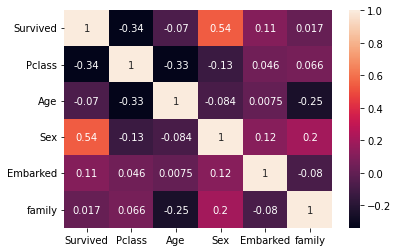

In [148]:
sns.heatmap(df1.corr(),annot=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


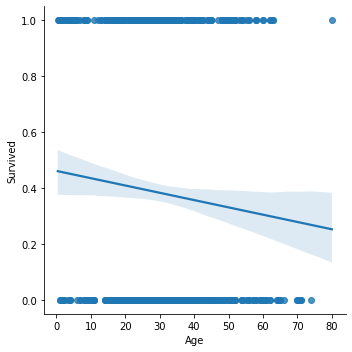

In [149]:
sns.lmplot('Age','Survived',data=df1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


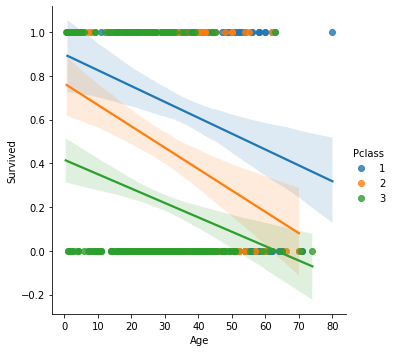

In [150]:
sns.lmplot('Age','Survived',hue='Pclass',data=df1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


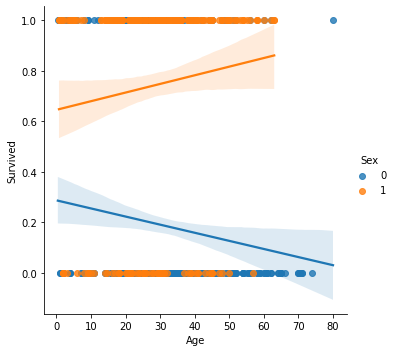

In [151]:
sns.lmplot('Age','Survived',hue='Sex',data=df1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


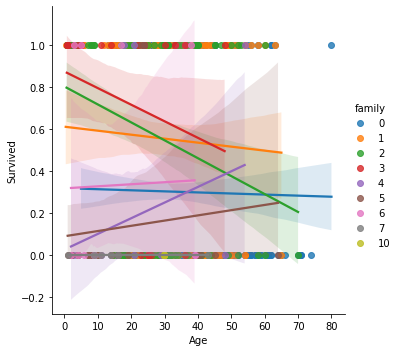

In [152]:
sns.lmplot('Age','Survived',hue='family',data=df1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


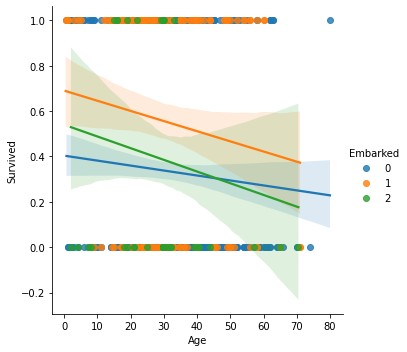

In [153]:
sns.lmplot('Age','Survived',hue='Embarked',data=df1)

In [154]:
X=df1.drop('Survived',axis=1)
y=df1['Survived']

**5) Training and Testing**

In [155]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [156]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [157]:
y_knn_pred=knn.predict(X_test)

In [158]:
from sklearn.metrics import accuracy_score
k=accuracy_score(y_test,y_knn_pred)
k

0.726457399103139

In [159]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [160]:
y_rf_pred=rf.predict(X_test)

In [161]:
from sklearn.metrics import accuracy_score
r=accuracy_score(y_test,y_rf_pred)
r

0.7892376681614349

In [162]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [163]:
y_dt_pred=dt.predict(X_test)

In [164]:
from sklearn.metrics import accuracy_score
d=accuracy_score(y_test,y_dt_pred)
d

0.7892376681614349

In [165]:
from sklearn.svm import SVC
sv=SVC()
sv.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [166]:
y_sv_pred=sv.predict(X_test)

In [167]:
from sklearn.metrics import accuracy_score
s=accuracy_score(y_test,y_sv_pred)
s

0.6547085201793722

In [168]:
from sklearn.linear_model import LogisticRegression
lreg=LogisticRegression()
lreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [169]:
y_pred=lreg.predict(X_test)

In [170]:
from sklearn.metrics import accuracy_score
l=accuracy_score(y_test,y_pred)
l

0.8026905829596412

In [171]:
y_train_pred=lreg.predict(X_train)

In [172]:
accuracy_score(y_train,y_train_pred)

0.8053892215568862

**6) Evaluation Metrics**

In [173]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[118,  21],
       [ 23,  61]])

In [174]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.85      0.84       139
           1       0.74      0.73      0.73        84

    accuracy                           0.80       223
   macro avg       0.79      0.79      0.79       223
weighted avg       0.80      0.80      0.80       223



**4) Choice of Algorithm**

In [176]:
models=pd.DataFrame({'model':['KNN','RandomForest','DecisionTree','SVM',"LogisticRegression"],'accuracy_Score':[k,r,d,s,l]})
models.sort_values(by='accuracy_Score',ascending=False)

,model,accuracy_Score
4,LogisticRegression,0.802691
1,RandomForest,0.789238
2,DecisionTree,0.789238
0,KNN,0.726457
3,SVM,0.654709
